## Loading the required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Ingestion

In [4]:
subscribers_df = pd.read_csv(r"C:\Users\lavan\OneDrive\Desktop\LanaKrissh\Python_Final_Project\subscribers (1).csv", index_col = "Unnamed: 0")
content_df = pd.read_csv(r"C:\Users\lavan\OneDrive\Desktop\LanaKrissh\Python_Final_Project\content (1).csv", index_col = "Unnamed: 0")
content_consumption_df = pd.read_csv(r"C:\Users\lavan\OneDrive\Desktop\LanaKrissh\Python_Final_Project\content_consumption (1).csv", index_col = "Unnamed: 0")

In [5]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN


In [6]:
content_consumption_df.head()

,user_id,device_type,total_watch_time_mins
0,UIDJS877cc0e02c9,Mobile,14613
1,UIDJS06384e7ff06,Mobile,13271
2,UIDJSc3997b7beb7,Mobile,4644
3,UIDJS66726ce2325,Mobile,5734
4,UIDJS040119b6107,Mobile,2939


In [7]:
content_df.head()

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135


In [15]:

content_consumption_df.dtypes

user_id                  object
device_type              object
total_watch_time_mins     int64
dtype: object

In [16]:
subscribers_df.dtypes


user_id                  object
age_group                object
city_tier                object
subscription_date        object
subscription_plan        object
last_active_date         object
plan_change_date         object
new_subscription_plan    object
dtype: object

In [17]:
content_df.dtypes

content_id      object
content_type    object
language        object
genre           object
runtime          int64
dtype: object

In [22]:

content_consumption_avg = content_consumption_df.groupby('device_type').mean('total_watch_time_mins')
content_consumption_avg = content_consumption_avg.reset_index()
content_consumption_avg

,device_type,total_watch_time_mins
0,Laptop,4857.260399
1,Mobile,10563.645316
2,TV,5682.622277


<Axes: xlabel='device_type', ylabel='total_watch_time_mins'>

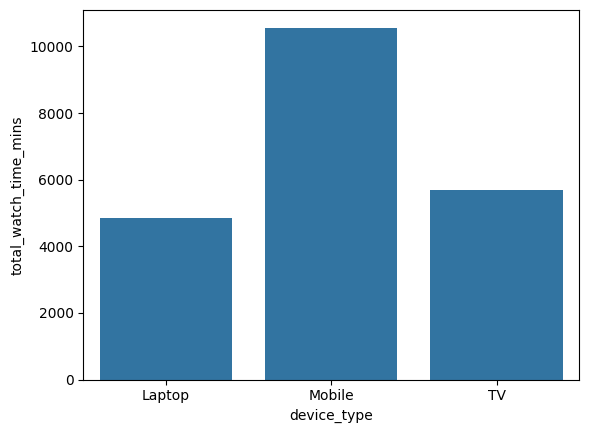

In [23]:
sns.barplot(data=content_consumption_avg, x = 'device_type', y='total_watch_time_mins')

In [10]:
# Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations.

subscribers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44620 entries, 0 to 44619
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                44620 non-null  object
 1   age_group              44620 non-null  object
 2   city_tier              44620 non-null  object
 3   subscription_date      44620 non-null  object
 4   subscription_plan      44620 non-null  object
 5   last_active_date       6652 non-null   object
 6   plan_change_date       7090 non-null   object
 7   new_subscription_plan  7090 non-null   object
dtypes: object(8)
memory usage: 3.1+ MB


## Date Data validation

In [11]:
subscribers_df['subscription_date'] = pd.to_datetime(subscribers_df['subscription_date'])
subscribers_df['last_active_date'] = pd.to_datetime(subscribers_df['last_active_date'])
subscribers_df['plan_change_date'] = pd.to_datetime(subscribers_df['plan_change_date'])

In [12]:
subscribers_df.dtypes


user_id                          object
age_group                        object
city_tier                        object
subscription_date        datetime64[ns]
subscription_plan                object
last_active_date         datetime64[ns]
plan_change_date         datetime64[ns]
new_subscription_plan            object
dtype: object

In [13]:
subscribers_df.columns

Index(['user_id', 'age_group', 'city_tier', 'subscription_date',
       'subscription_plan', 'last_active_date', 'plan_change_date',
       'new_subscription_plan'],
      dtype='object')

In [ ]:
subscribers_df.shape    # count Rows and Columns 

(44620, 8)

In [25]:
# Fetching the missing values count in dataframe

subscribers_df.isnull().sum()

user_id                      0
age_group                    0
city_tier                    0
subscription_date            0
subscription_plan            0
last_active_date         37968
plan_change_date         37530
new_subscription_plan    37530
dtype: int64

## split data to numerical and categorical columns

In [23]:
content_df

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135
...,...,...,...,...,...
2355,CJSSTETHR767c0,Series,Telugu,Thriller,20
2356,CJSSTETHR8b80e,Series,Telugu,Thriller,30
2357,CJSSTETHR92817,Series,Telugu,Thriller,45
2358,CJSSTETHRccd4d,Series,Telugu,Thriller,30


In [26]:
content_numerical_df = content_df.select_dtypes(include="int")
content_categorical_df = content_df.select_dtypes(include="O")

In [21]:
content_numerical_df.head()

,runtime
0,90
1,135
2,120
3,120
4,135


In [22]:
content_categorical_df.head()

,content_id,content_type,language,genre
0,CJSMBEACT2e633,Movie,Bengali,Action
1,CJSMBEACT34aec,Movie,Bengali,Action
2,CJSMBEACT83b46,Movie,Bengali,Action
3,CJSMBECOM12e7a,Movie,Bengali,Comedy
4,CJSMBECOM5431a,Movie,Bengali,Comedy


## missing value treatement

### Numerical data
    * mean , median

### categorical data
    * mode

## outlier detection

In [27]:
content_numerical_df.describe()

,runtime
count,2360.000000
mean,89.550847
std,52.637611
min,5.000000
25%,30.000000
50%,90.000000
75%,120.000000
max,300.000000


In [28]:
content_categorical_df.describe()

,content_id,content_type,language,genre
count,2360,2360,2360,2360
unique,2360,3,10,12
top,CJSMBEACT2e633,Movie,English,Action
freq,1,1180,800,398


<Axes: xlabel='runtime'>

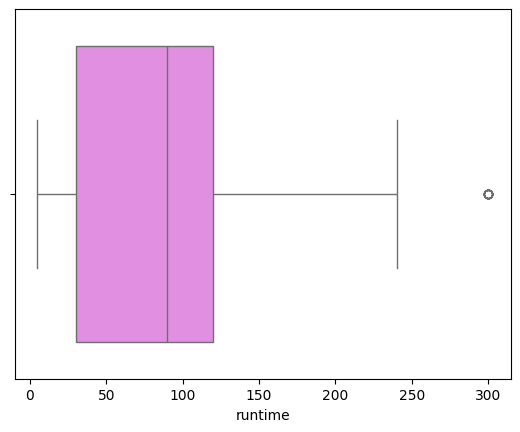

In [36]:
sns.boxplot(content_numerical_df['runtime'],orient='h',color='violet')

## univariate analysis

<Axes: xlabel='runtime', ylabel='Count'>

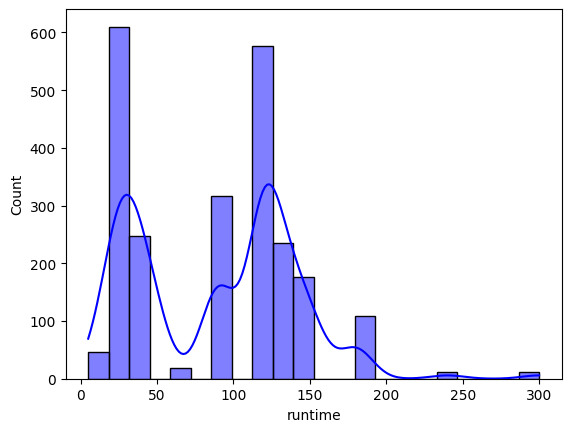

In [44]:
# univariate analysis

sns.histplot(content_numerical_df['runtime'], kde=True,color="blue")

<Axes: xlabel='count', ylabel='content_type'>

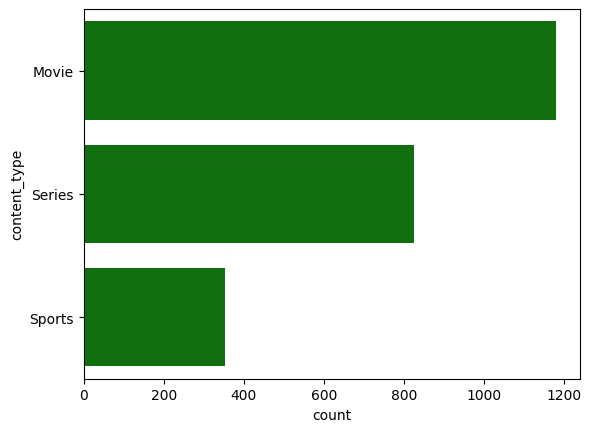

In [47]:
sns.countplot(content_categorical_df['content_type'],color="green")

<Axes: xlabel='count', ylabel='language'>

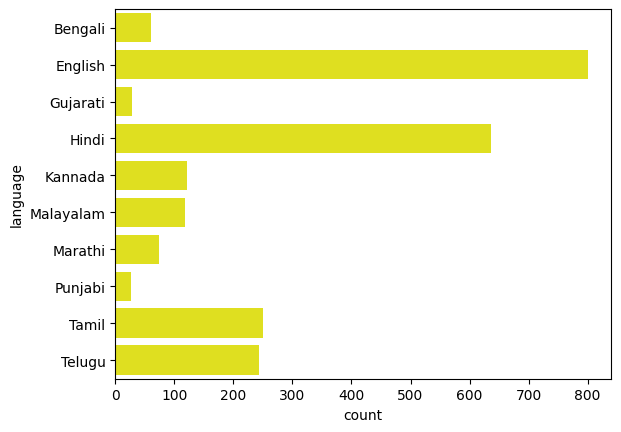

In [48]:
sns.countplot(content_categorical_df['language'],color="yellow")

<Axes: xlabel='count', ylabel='genre'>

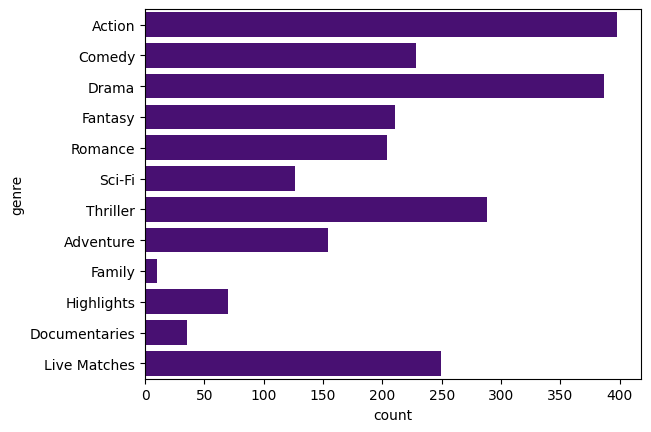

In [50]:
sns.countplot(content_categorical_df['genre'],color="indigo")

## bivariate analysis

<Axes: xlabel='count', ylabel='language'>

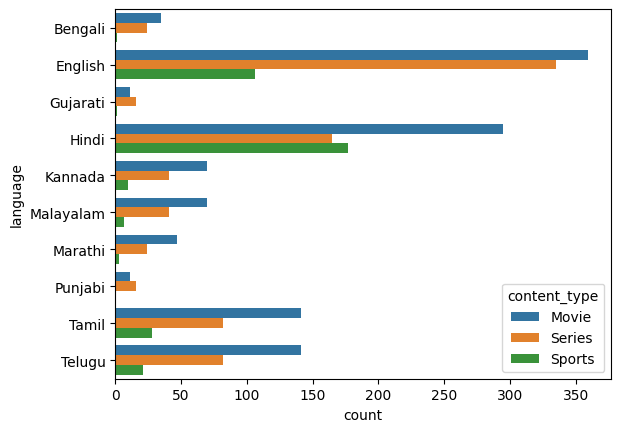

In [51]:
sns.countplot(data= content_categorical_df, y="language" , hue='content_type')

<Axes: xlabel='count', ylabel='genre'>

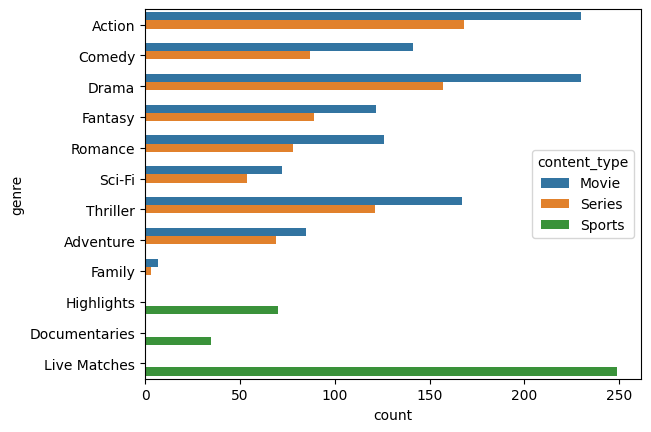

In [55]:
sns.countplot(data=content_categorical_df,y="genre",hue="content_type")

### Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations. 

In [40]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN


In [56]:
# Fetching subscription_plan count in age_group category

sub_plan_vs_age = subscribers_df.groupby('age_group').value_counts(['subscription_plan']).to_frame().reset_index()
sub_plan_vs_age

,age_group,subscription_plan,count
0,18-24,VIP,3252
1,18-24,Premium,2305
2,18-24,Free,2119
3,25-34,VIP,8673
4,25-34,Premium,5938
5,25-34,Free,5458
6,35-44,VIP,4846
7,35-44,Premium,3417
8,35-44,Free,3011
9,45+,VIP,2386


In [63]:
sub_age_vs_tier=subscribers_df.groupby('age_group').value_counts(['city_tier']).to_frame().reset_index()
sub_age_vs_tier

,age_group,city_tier,count
0,18-24,Tier 1,4393
1,18-24,Tier 2,2279
2,18-24,Tier 3,1004
3,25-34,Tier 1,11444
4,25-34,Tier 2,6040
5,25-34,Tier 3,2585
6,35-44,Tier 1,6408
7,35-44,Tier 2,3434
8,35-44,Tier 3,1432
9,45+,Tier 1,3206


<Axes: xlabel='age_group', ylabel='count'>

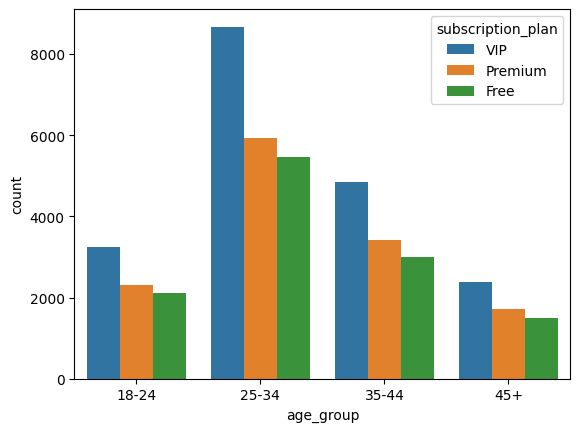

In [62]:
sns.barplot(data = sub_plan_vs_age, x = 'age_group',y='count',hue = 'subscription_plan')

<Axes: xlabel='age_group', ylabel='count'>

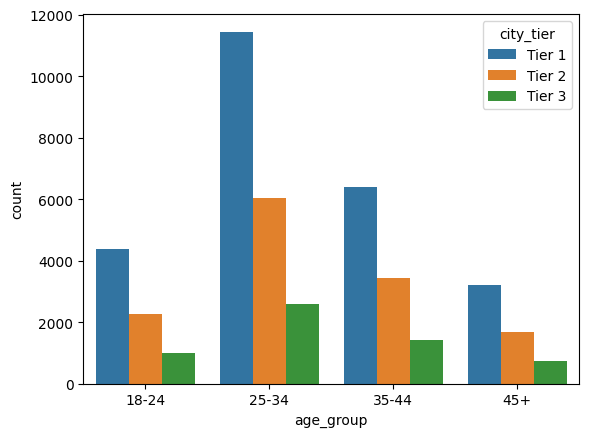

In [64]:
sns.barplot(data = sub_age_vs_tier, y= 'count', x='age_group',hue='city_tier')

In [18]:
subscribers_df.head(2)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,None
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,None


In [66]:
# Fetching subscribers count on daily basis

subscription_data = subscribers_df.groupby(['subscription_date'])['user_id'].count().to_frame().reset_index()
subscription_data

,subscription_date,user_id
0,2024-01-01,116
1,2024-01-02,137
2,2024-01-03,133
3,2024-01-04,135
4,2024-01-05,126
...,...,...
330,2024-11-26,145
331,2024-11-27,134
332,2024-11-28,138
333,2024-11-29,156


In [ ]:
#Same as above
daily_sub = subscribers_df.groupby(['subscription_date'])['city_tier'].count().to_frame().reset_index()
daily_sub

,subscription_date,city_tier
0,2024-01-01,116
1,2024-01-02,137
2,2024-01-03,133
3,2024-01-04,135
4,2024-01-05,126
...,...,...
330,2024-11-26,145
331,2024-11-27,134
332,2024-11-28,138
333,2024-11-29,156


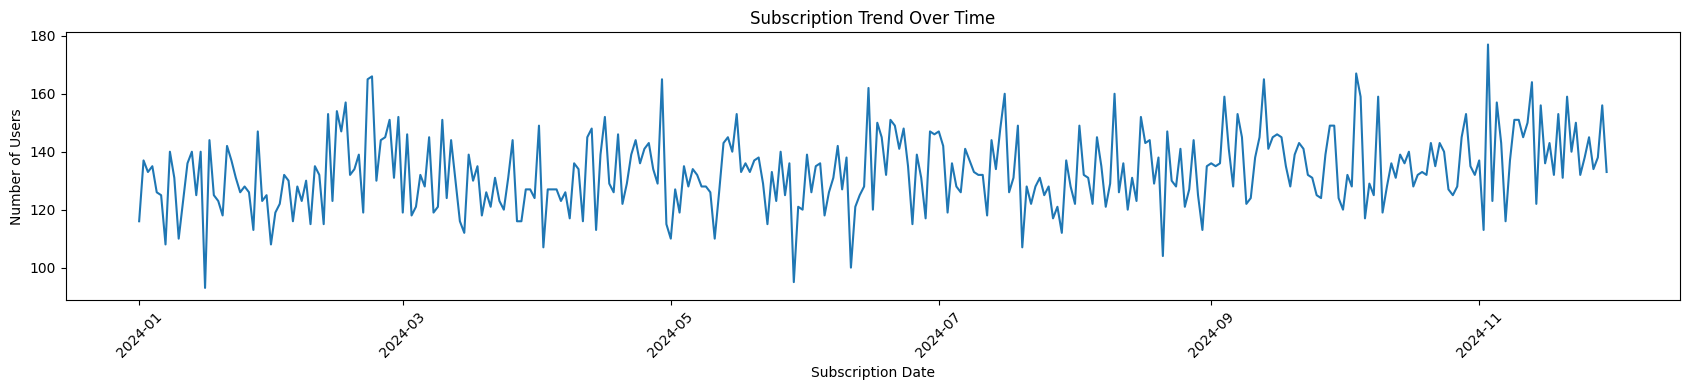

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17, 4)) 
sns.lineplot(data=subscription_data, x='subscription_date', y ='user_id', markers='*')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
plan_changed_cus = subscribers_df[['user_id','plan_change_date','subscription_plan','new_subscription_plan']].dropna()
# subscribers_df[['user_id','plan_change_date','subscription_plan','new_subscription_plan']]

In [54]:
plan_changed_cus.head(10)

,user_id,plan_change_date,subscription_plan,new_subscription_plan
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP
19,UIDJS0019b04b32f,2024-08-11,VIP,Free
23,UIDJS001defd7e03,2024-08-18,VIP,Free
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free
58,UIDJS004c0eb4154,2024-09-26,VIP,Free
59,UIDJS004d1ca89e3,2024-08-31,VIP,Free
74,UIDJS005f238dbb0,2024-08-03,Premium,Free
76,UIDJS006315e24bf,2024-03-04,Free,Premium
77,UIDJS0063b1fe9a3,2024-07-25,VIP,Free
81,UIDJS006711c9331,2024-06-22,Free,VIP


In [55]:
rank = {"Free": 1, "Premium": 2, "VIP": 3}

def cus_plan_change(old_plan, new_plan):

    if rank[new_plan] > rank[old_plan]:
        return "Upgrade"
    elif rank[new_plan] < rank[old_plan]:
        return "Downgrade"
    else:
        return "No Change"

plan_changed_cus['cus_plan_changed'] = plan_changed_cus.apply(lambda rows: cus_plan_change(rows['subscription_plan'], rows['new_subscription_plan']), axis=1)


In [56]:
plan_changed_cus['subscription_plan'].unique()

array(['Premium', 'VIP', 'Free'], dtype=object)

In [57]:
plan_changed_cus

,user_id,plan_change_date,subscription_plan,new_subscription_plan,cus_plan_changed
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP,Upgrade
19,UIDJS0019b04b32f,2024-08-11,VIP,Free,Downgrade
23,UIDJS001defd7e03,2024-08-18,VIP,Free,Downgrade
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free,Downgrade
58,UIDJS004c0eb4154,2024-09-26,VIP,Free,Downgrade
...,...,...,...,...,...
44598,UIDJSffd997ae360,2024-08-28,VIP,Free,Downgrade
44600,UIDJSffdbd91a9cb,2024-08-11,VIP,Premium,Downgrade
44601,UIDJSffdd37f5584,2024-08-04,Premium,VIP,Upgrade
44602,UIDJSffe11ff87fb,2024-05-16,VIP,Free,Downgrade


In [58]:
plan_changed_cus_grp = plan_changed_cus.groupby('plan_change_date').value_counts(['cus_plan_changed']).to_frame().reset_index()

In [59]:
plan_changed_cus_grp.head()

,plan_change_date,cus_plan_changed,count
0,2024-02-01,Downgrade,7
1,2024-02-02,Downgrade,7
2,2024-02-02,Upgrade,3
3,2024-02-03,Upgrade,6
4,2024-02-03,Downgrade,5


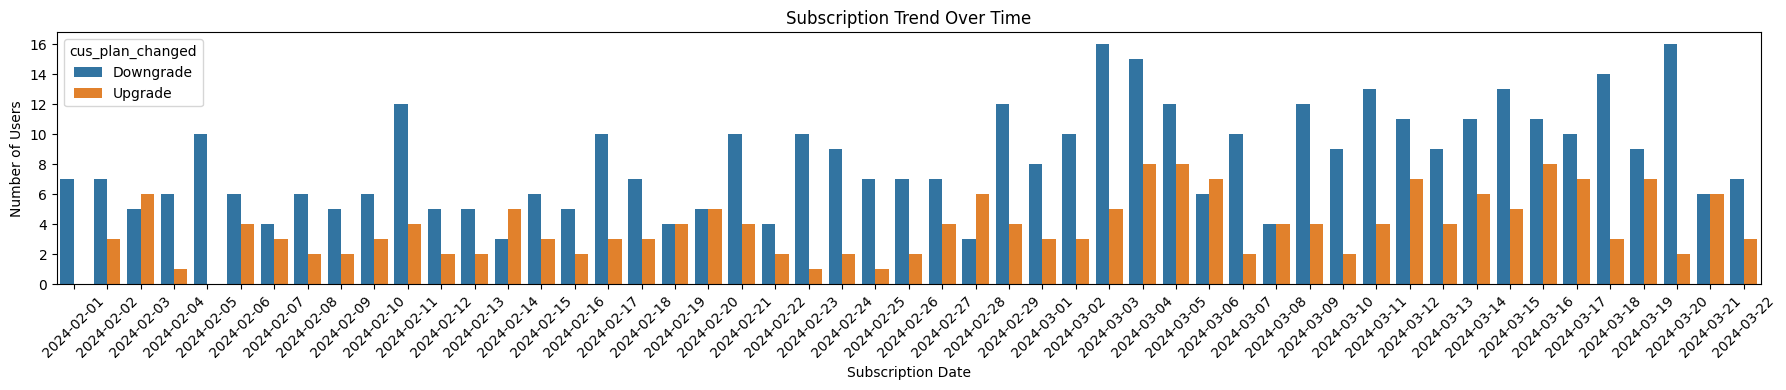

In [61]:

fig, ax = plt.subplots(figsize=(18, 4)) 
sns.barplot(data=plan_changed_cus_grp.head(100), x='plan_change_date', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Instead of looking into day wise --> quarter wise or monthly wise

plan_changed_cus_grp["plan_change_month"] = plan_changed_cus_grp['plan_change_date'].dt.strftime(date_format="%Y-%m")

In [64]:
plan_changed_cus_mnt_df = plan_changed_cus_grp.groupby(['plan_change_month','cus_plan_changed'])['count'].sum().to_frame().reset_index()

In [65]:
plan_changed_cus_mnt_df

,plan_change_month,cus_plan_changed,count
0,2024-02,Downgrade,193
1,2024-02,Upgrade,83
2,2024-03,Downgrade,322
3,2024-03,Upgrade,149
4,2024-04,Downgrade,380
5,2024-04,Upgrade,157
6,2024-05,Downgrade,416
7,2024-05,Upgrade,180
8,2024-06,Downgrade,437
9,2024-06,Upgrade,178


5. Downgrade Patterns: Analysis of subscription downgrades and associated trends.

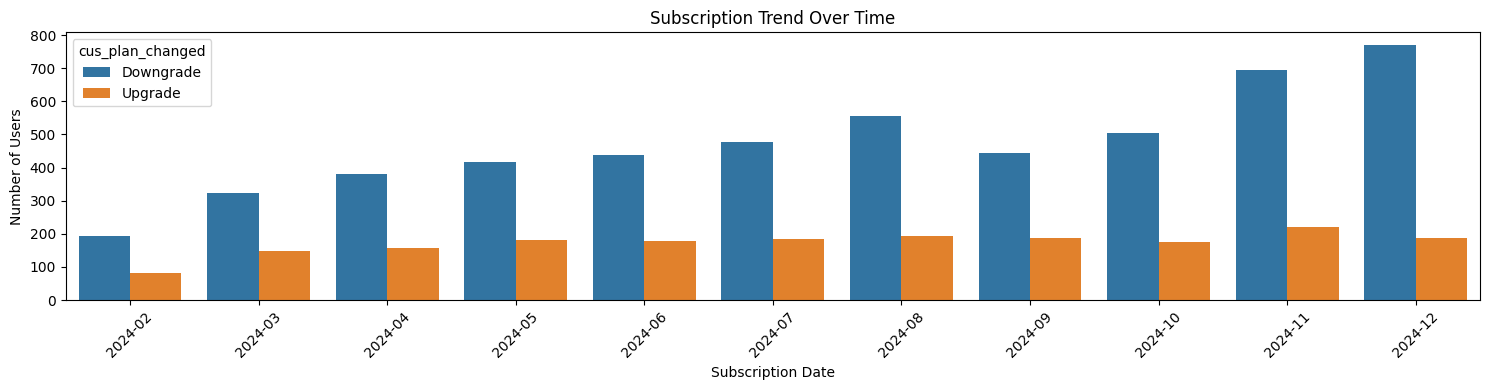

In [66]:
fig, ax = plt.subplots(figsize=(15, 4)) 
sns.barplot(data=plan_changed_cus_mnt_df, x='plan_change_month', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Assignment :
1) Content Consumption Behavior: Patterns in total watch time, device preferences, and variations by user demographics.
2) what cause downgrade
    -Hint: combine content_consumption_df and subscribers_df


## Inactivity Analysis: Patterns of inactivity across age groups, city tiers, and subscription plans.

In [69]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN


In [79]:
subscribers_df['customer_activity'] = subscribers_df['last_active_date'].fillna("inactive")

In [72]:
subscribers_df['last_active_date'].value_counts()
subscribers_df['last_active_date'].max()

Timestamp('2024-12-29 00:00:00')

In [74]:
threshold_date = subscribers_df['last_active_date'].max() - pd.Timedelta(days=60)
threshold_date

Timestamp('2024-10-30 00:00:00')

In [75]:
# checking wheather the customer is inactive from past 60 days.

subscribers_df["is_inactive"] = subscribers_df["last_active_date"].isna() | (subscribers_df["last_active_date"] < threshold_date)

In [77]:
subscribers_df

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,is_inactive
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN,True
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN,True
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN,True
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN,True
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN,True
...,...,...,...,...,...,...,...,...,...
44615,UIDJSfffbb38249e,25-34,Tier 2,2024-11-12,Free,NaT,NaT,NaN,True
44616,UIDJSfffbd759005,45+,Tier 1,2024-05-21,VIP,NaT,NaT,NaN,True
44617,UIDJSfffebd3002b,25-34,Tier 1,2024-09-27,VIP,2024-10-29,NaT,NaN,True
44618,UIDJSffff6698084,35-44,Tier 3,2024-10-12,VIP,NaT,NaT,NaN,True


In [79]:
subscribers_df[subscribers_df['is_inactive']][['age_group','is_inactive']].value_counts()

age_group  is_inactive
25-34      True           18928
35-44      True           10707
18-24      True            7208
45+        True            5313
Name: count, dtype: int64

<Axes: ylabel='age_group,is_inactive'>

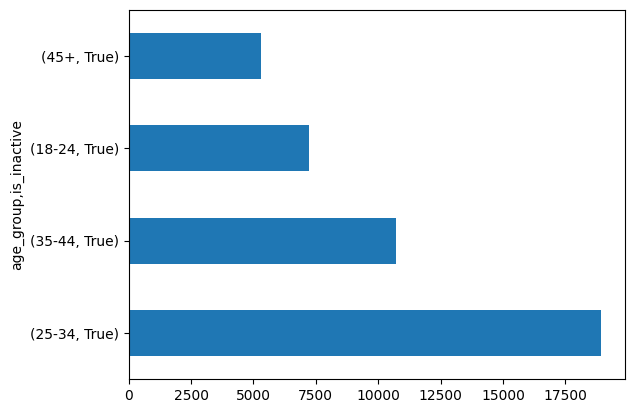

In [80]:
subscribers_df[subscribers_df['is_inactive'] == True][['age_group','is_inactive']].value_counts().plot(kind='barh')

<Axes: ylabel='age_group,city_tier'>

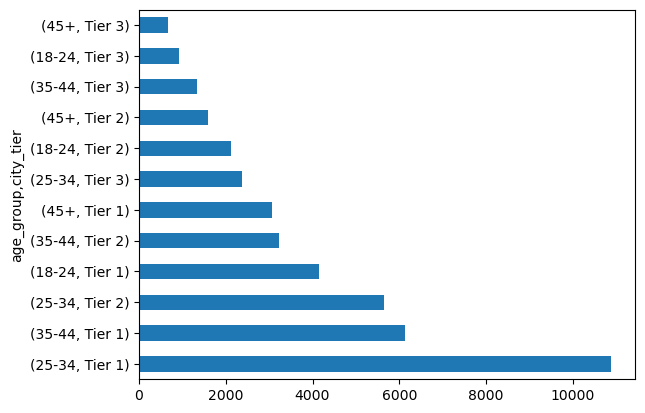

In [ ]:
subscribers_df[subscribers_df['is_inactive'] == True][['age_group','city_tier']].value_counts().plot(kind='barh')

<Axes: xlabel='age_group', ylabel='count'>

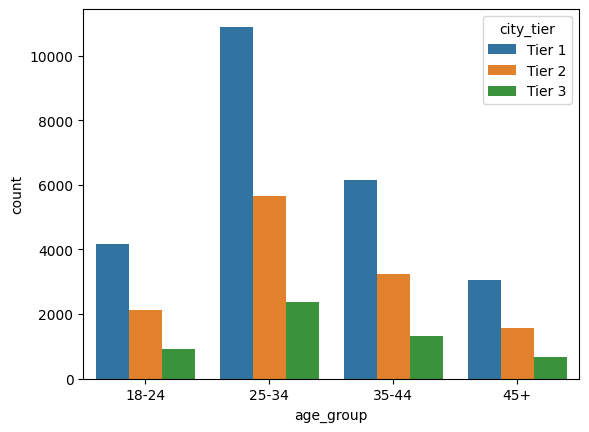

In [81]:
sns.countplot(data=subscribers_df[subscribers_df['is_inactive'] == True] , x='age_group', hue= 'city_tier' )

<Axes: xlabel='subscription_plan'>

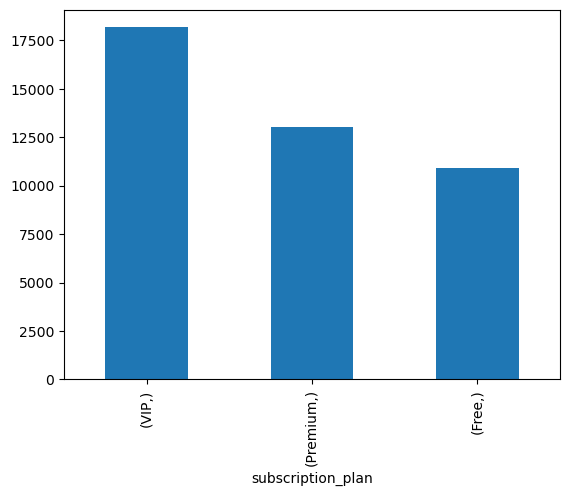

In [111]:
subscribers_df[subscribers_df['is_inactive'] == True][['subscription_plan']].value_counts().plot(kind='bar')